In [1]:
import numpy as np
import scipy as sp
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import pickle

In [2]:
with open("data/OR_precincts/OR_precinct_graph.p", "rb") as f_in:
    graph = pickle.load(f_in)

In [3]:
elections = [Election("GOV18", {"Dem": "GOV18D", "Rep": "GOV18R"}),
             Election("PRES16",{"Dem": "PRES16D","Rep":"PRES16R"}),
             Election("SEN16",{"Dem": "SEN16D","Rep":"SEN16R"}),
             Election("GOV16", {"Dem": "GOV16D", "Rep": "GOV16R"}),
             Election("AG16", {"Dem": "AG16D", "Rep": "AG16R"}),
             Election("SOS16", {"Dem": "SOS16D", "Rep": "SOS16R"}),
             Election("USH18", {"Dem": "USH18D", "Rep": "USH18R"}),
             Election("USH16", {"Dem": "USH16D", "Rep": "USH16R"})]


or_updaters = {"population" : Tally("TOTPOP", alias="population"), 
               "VAP": Tally("VAP"),
               "HVAP": Tally("HVAP"), 
               "HVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["HVAP"].items()},
               "ASIANVAP": Tally("ASIANVAP"), 
               "ASIANVAP_perc": lambda p: {k: (v / p["VAP"][k]) for k, v in p["ASIANVAP"].items()},
               "cut_edges": cut_edges}

election_updaters = {election.name: election for election in elections}
or_updaters.update(election_updaters)

In [4]:
enact_cong = Partition(graph, assignment="CD", updaters=or_updaters)
enact_sen = Partition(graph, assignment="SEND", updaters=or_updaters)
enact_house = Partition(graph, assignment="HDIST", updaters=or_updaters)

In [5]:
elections = ["GOV18", "PRES16", "SEN16", "GOV16", "AG16", "SOS16", "USH18", "USH16"]
list(map(lambda e: enact_cong[e].seats("Dem"), elections))

[2, 4, 5, 3, 4, 2, 4, 4]

In [14]:
df = gpd.read_file("data/OR_precincts/OR_precincts.shp")

In [7]:
df["USH16Radj"] = df.apply(lambda row: row["USH16R"] if row["CD"] != "03" else 0, axis=1)

In [8]:
np.mean(df["TOTPOP"])

2873.521380345086

In [9]:
np.max(df["TOTPOP"])

17974

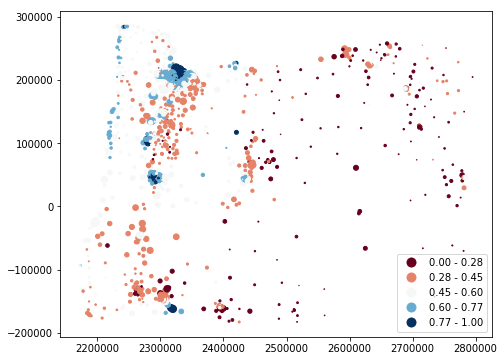

In [38]:
points.plot(marker="o", markersize="Scale",column="USH18DS",
            cmap="RdBu", legend=True, figsize=(10,6),scheme='naturalbreaks')

In [20]:
list(filter(lambda x: x==0, df.TOTPOP))

[0, 0, 0, 0]

In [21]:
np.mean(np.abs(df["PRES16DS"] - 0.5))

0.171201335048706

In [22]:
np.mean(np.abs(df["AG16DS"] - 0.5))

0.139634231791909

In [23]:
np.mean(np.abs(df["USH18DS"] - 0.5))

0.16306703708731912

## Baseline Partisanship of Precincts

In [11]:
df["USH16DS"] = df.apply(lambda row: row["USH16D"] / (row["USH16D"] + row["USH16Radj"]) if
                          row["USH16D"] > 0 else 0, axis=1)
df["USH18DS"] = df.apply(lambda row: row["USH18D"] / (row["USH18D"] + row["USH18R"]) if
                          row["USH18D"] > 0 else 0, axis=1)
df["PRES16DS"] = df.apply(lambda row: row["PRES16D"] / (row["PRES16D"] + row["PRES16R"]) if
                          row["PRES16D"] > 0 else 0, axis=1)
df["AG16DS"] = df.apply(lambda row: row["AG16D"] / (row["AG16D"] + row["AG16R"]) if
                          row["AG16D"] > 0 else 0, axis=1)
df["SOS16DS"] = df.apply(lambda row: row["SOS16D"] / (row["SOS16D"] + row["SOS16R"]) if
                          row["SOS16D"] > 0 else 0, axis=1)
df["SEN16DS"] = df.apply(lambda row: row["SEN16D"] / (row["SEN16D"] + row["SEN16R"]) if
                          row["SEN16D"] > 0 else 0, axis=1)
df["GOV16DS"] = df.apply(lambda row: row["GOV16D"] / (row["GOV16D"] + row["GOV16R"]) if
                          row["GOV16D"] > 0 else 0, axis=1)
df["GOV18DS"] = df.apply(lambda row: row["GOV18D"] / (row["GOV18D"] + row["GOV18R"]) if
                          row["GOV18D"] > 0 else 0, axis=1)

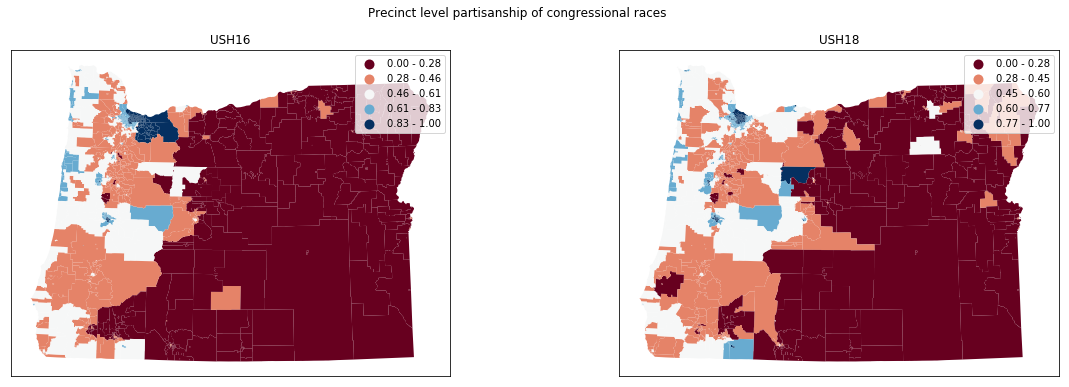

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
fig.suptitle("Precinct level partisanship of congressional races")
df.plot(column="USH16DS",  cmap="RdBu", ax=ax1, legend=True, scheme='naturalbreaks')
ax1.set_title("USH16")
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

df.plot(column="USH18DS", legend=True, cmap="RdBu", ax=ax2, scheme='naturalbreaks')
ax2.set_title("USH18")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
# plt.savefig("plots/congressional_partisanship_precincts.png")
plt.show()

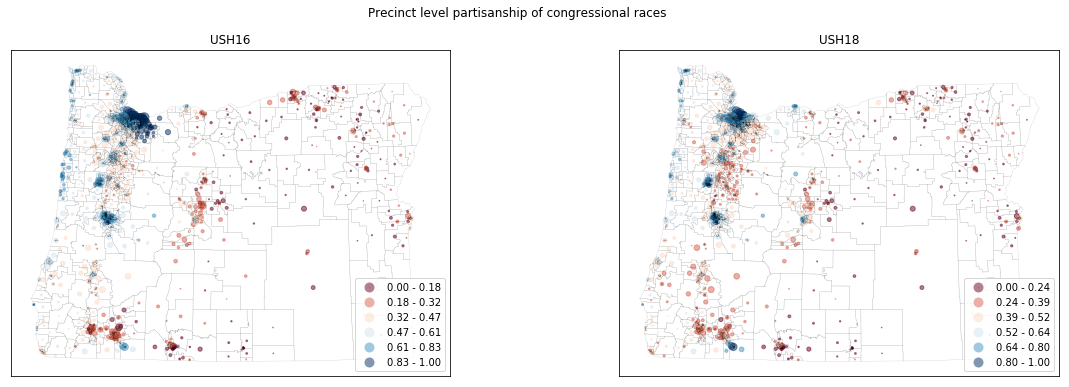

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
fig.suptitle("Precinct level partisanship of congressional races")
points.plot(marker="o", linestyle="None", markersize="Scale", column="USH16DS",
            cmap="RdBu", legend=True,figsize=(10,6), alpha=0.5, ax=ax1,
            scheme='naturalbreaks', k=6)
df.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.25,  ax=ax1)
ax1.set_title("USH16")
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

points.plot(marker="o", linestyle="None", markersize="Scale", column="USH18DS",
            cmap="RdBu", legend=True,figsize=(10,6), alpha=0.5, ax=ax2,
            scheme='naturalbreaks', k=6)
df.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.25,  ax=ax2)
ax2.set_title("USH18")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
# plt.savefig("plots/congressional_partisanship_precincts_dot_plots.png")
plt.show()

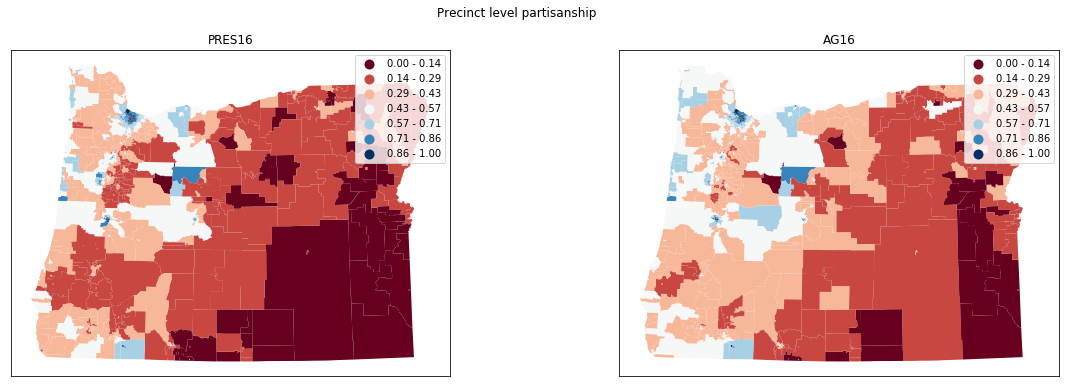

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
fig.suptitle("Precinct level partisanship")
df.plot(column="PRES16DS",  cmap="RdBu", ax=ax1, legend=True,scheme='equalinterval', k=7)
ax1.set_title("PRES16")
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

df.plot(column="AG16DS", legend=True, cmap="RdBu", ax=ax2, scheme='equalinterval', k=7)
ax2.set_title("AG16")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
# plt.savefig("plots/precinct_level_partisanship.png")
plt.show()

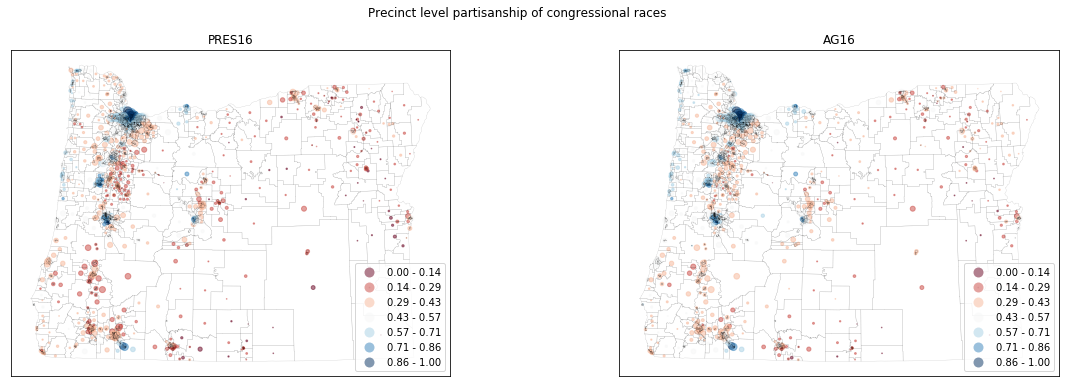

In [32]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
fig.suptitle("Precinct level partisanship of congressional races")
points.plot(marker="o", linestyle="None", markersize="Scale", column="PRES16DS",
            cmap="RdBu", legend=True,figsize=(10,6), alpha=0.5, ax=ax1,
            scheme='equalinterval', k=7)
df.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.25,  ax=ax1)
ax1.set_title("PRES16")
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

points.plot(marker="o", linestyle="None", markersize="Scale", column="AG16DS",
            cmap="RdBu", legend=True,figsize=(10,6), alpha=0.5, ax=ax2,
            scheme='equalinterval', k=7)
df.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.25,  ax=ax2)
ax2.set_title("AG16")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
# plt.savefig("plots/precinct_level_partisanship_dots.png")
plt.show()

In [12]:
points = df[["geometry", "TOTPOP", "USH16DS", "USH18DS","PRES16DS",
             "AG16DS", "SOS16DS","SEN16DS", "GOV16DS", "GOV18DS"]]

In [13]:
points["geometry"] = points.geometry.centroid

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
points["Scale"] = points.TOTPOP / 200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


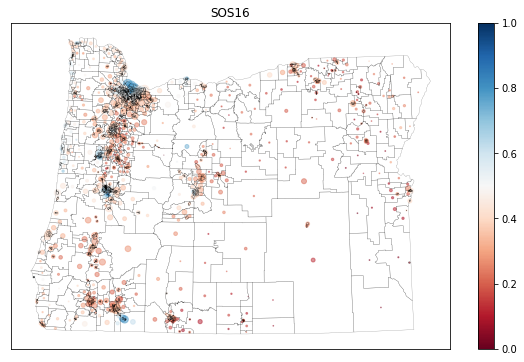

In [15]:
fig = points.plot(marker="o", linestyle="None", markersize="Scale", column="SOS16DS",
            cmap="RdBu", legend=True,figsize=(10,6), alpha=0.5)
fig.set_title("SOS16")
df.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.5,  ax=fig)
fig.get_xaxis().set_visible(False)
fig.get_yaxis().set_visible(False)
plt.savefig("plots/precinct_level_partisanship_sos16.png")
plt.show()

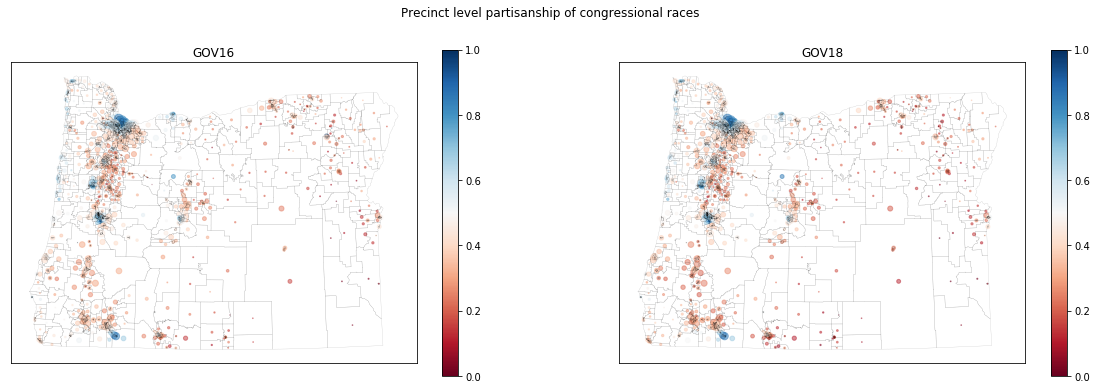

In [85]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
fig.suptitle("Precinct level partisanship of congressional races")
points.plot(marker="o", linestyle="None", markersize="Scale", column="GOV16DS",
            cmap="RdBu", legend=True,figsize=(10,6), alpha=0.5, ax=ax1)
df.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.25,  ax=ax1)
ax1.set_title("GOV16")
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

points.plot(marker="o", linestyle="None", markersize="Scale", column="GOV18DS",
            cmap="RdBu", legend=True,figsize=(10,6), alpha=0.5, ax=ax2)
df.plot(color="None", linewidth=0.25, edgecolor='k', alpha=0.25,  ax=ax2)
ax2.set_title("GOV18")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)
# plt.savefig("plots/congressional_partisanship_precincts_dot_plots.png")
plt.show()

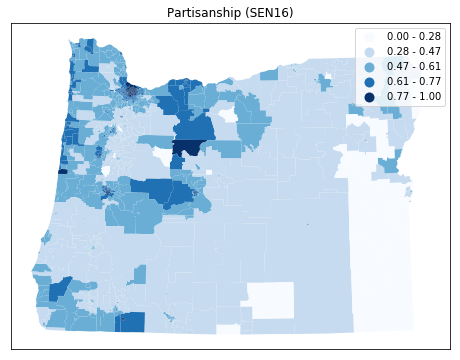

In [82]:
fig = df.plot(column="SEN16DS", legend=True, cmap="Blues",figsize=(10,6),
              scheme='naturalbreaks')
fig.set_title("Partisanship (SEN16)")
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
# plt.savefig("plots/precinct_level_partisanship_sen16_no_dots.png")
plt.show()

In [162]:
cong16 = np.array(df["USH16DS"])
cong18 = np.array(df["USH18DS"])
elect_prec = {k: np.array(df["{}DS".format(k)]) for k in elects}

In [163]:
elect_prec

{'AG16': array([0.68487528, 0.57464401, 0.51256281, ..., 0.48487903, 0.32229581,
        0.43243243]),
 'PRES16': array([0.74596514, 0.57380254, 0.5273224 , ..., 0.44512195, 0.33333333,
        0.27027027]),
 'SEN16': array([0.74119548, 0.62789598, 0.53174603, ..., 0.50630252, 0.42992624,
        0.38888889]),
 'GOV16': array([0.66861899, 0.54623365, 0.4800995 , ..., 0.43131313, 0.24846626,
        0.33333333]),
 'GOV18': array([0.68041562, 0.56076555, 0.50716332, ..., 0.4419778 , 0.23977273,
        0.24324324]),
 'SOS16': array([0.62326044, 0.50937049, 0.43814433, ..., 0.38977636, 0.21696035,
        0.31428571])}

In [171]:
## Cong16
list(map(lambda x: (x[0], sp.spatial.distance.euclidean(cong16, x[1])), elect_prec.items()))

[('AG16', 5.515914102300116),
 ('PRES16', 5.610528281039918),
 ('SEN16', 6.4813919793041155),
 ('GOV16', 6.057863773146838),
 ('GOV18', 6.081184633269004),
 ('SOS16', 6.799428377070235)]

In [172]:
list(map(lambda x: (x[0], sp.spatial.distance.cosine(cong16, x[1])), elect_prec.items()))

[('AG16', 0.03627628851143094),
 ('PRES16', 0.03612795080645037),
 ('SEN16', 0.04854000709082529),
 ('GOV16', 0.04053160083524865),
 ('GOV18', 0.03869989739915569),
 ('SOS16', 0.03787891840499491)]

In [173]:
## Cong18
list(map(lambda x: (x[0], sp.spatial.distance.euclidean(cong18, x[1])), elect_prec.items()))

[('AG16', 2.249609987200428),
 ('PRES16', 2.404414624926899),
 ('SEN16', 3.5277271211017016),
 ('GOV16', 3.0660874087446137),
 ('GOV18', 2.9514655956760985),
 ('SOS16', 4.524073935329351)]

In [174]:
list(map(lambda x: (x[0], sp.spatial.distance.cosine(cong18, x[1])), elect_prec.items()))

[('AG16', 0.005551603807510741),
 ('PRES16', 0.0050388573315878205),
 ('SEN16', 0.012714715253585473),
 ('GOV16', 0.007406067339756794),
 ('GOV18', 0.004099627119343419),
 ('SOS16', 0.007333572527546961)]

## Enacted Plans

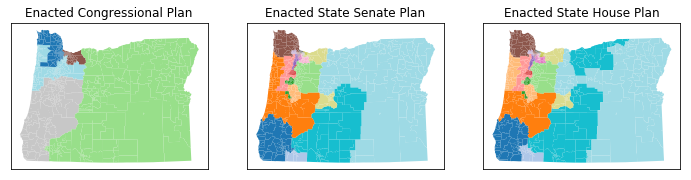

In [152]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,6))

enact_cong.plot(ax=ax1, cmap="tab20")
ax1.set_title("Enacted Congressional Plan")
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

enact_sen.plot(ax=ax2, cmap="tab20")
ax2.set_title("Enacted State Senate Plan")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

enact_house.plot(ax=ax3, cmap="tab20")
ax3.set_title("Enacted State House Plan")
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
plt.show()

In [19]:
import random
random.randint(0,9999)

8735

## Sample Plans

In [22]:
example_plans = []
for i, j in [("congress", 5), ("congress_2020", 3), 
             ("state_senate", 8), ("state_house", 7)]:
    example_plans.append(Partition.from_json("data/sample_plans/sample_part_{}_{}.json".format(i, j),
                                         assignment="District", updaters=or_updaters))

In [12]:
len(example_plans[0].parts)

5

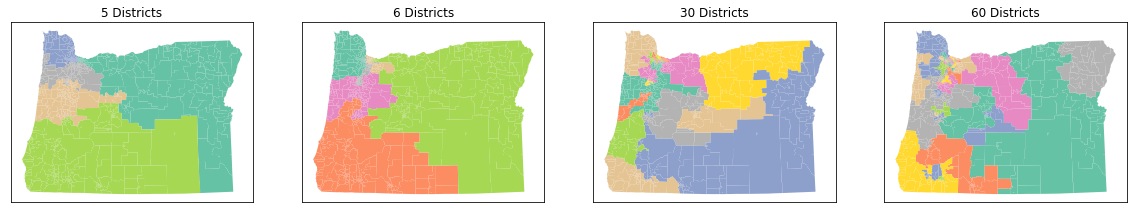

In [30]:
fig, axs = plt.subplots(1,4, figsize=(20,4))
# fig.suptitle("Sample Recom Plans")
for i in range(4):
    axs[i].set_title("{} Districts".format(len(example_plans[i].parts)))
    example_plans[i].plot(df, ax=axs[i], cmap="Set2")
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)
plt.savefig("plots/sample_plans/recom.png", bbox_inches="tight", dpi=200)
plt.show()

## Load Plans from Ensemble

In [44]:
compact_plans = []
for i in range(3):
    compact_plans.append(Partition.from_json("data/neutral_partisan_ensemble/parts/compact_part_congress_{}.json".format(i),
                                         assignment="District", updaters=or_updaters))

In [45]:
compact_plans[2]["SEN16"].seats("Dem")

5

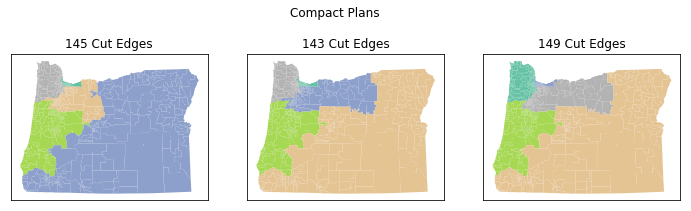

In [46]:
fig, axs = plt.subplots(1,3, figsize=(12,3.5))
fig.suptitle("Compact Plans")
for i in range(3):
    axs[i].set_title("{} Cut Edges".format(len(compact_plans[i]["cut_edges"])))
    compact_plans[i].plot(df, ax=axs[i], cmap="Set2")
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)
plt.show()

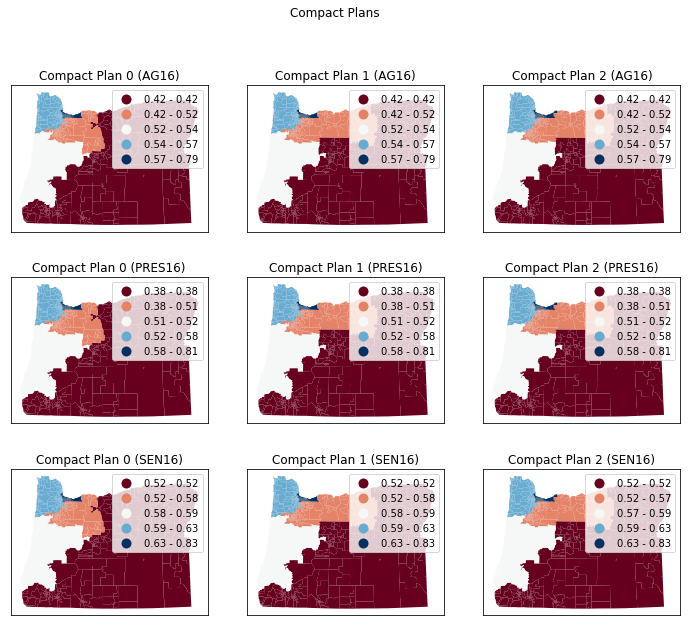

In [60]:
fig, axs = plt.subplots(3,3, figsize=(12,10))
fig.suptitle("Compact Plans")

for i in range(3):
    axs[0][i].set_title("Compact Plan {} (AG16)".format(i))
    df["x"] =[compact_plans[i]["AG16"].percent("Dem", compact_plans[i].assignment[j]) for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True,ax=axs[0][i], scheme="naturalbreaks")
    axs[0][i].axes.get_xaxis().set_visible(False)
    axs[0][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[1][i].set_title("Compact Plan {} (PRES16)".format(i))
    df["x"] =[compact_plans[i]["PRES16"].percent("Dem", compact_plans[i].assignment[j]) for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, scheme="naturalbreaks", ax=axs[1][i])
    axs[1][i].axes.get_xaxis().set_visible(False)
    axs[1][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[2][i].set_title("Compact Plan {} (SEN16)".format(i))
    df["x"] =[compact_plans[i]["SEN16"].percent("Dem", compact_plans[i].assignment[j]) for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, scheme="naturalbreaks", ax=axs[2][i])
    axs[2][i].axes.get_xaxis().set_visible(False)
    axs[2][i].axes.get_yaxis().set_visible(False)

plt.show()

In [52]:
df["comp_AGDS"] = [compact_plans[1]["AG16"].percent("Dem", compact_plans[1].assignment[i]) for i in df.index]
df["comp_PRESDS"] = [compact_plans[1]["PRES16"].percent("Dem", compact_plans[1].assignment[i]) for i in df.index]
df["comp_SENDS"] = [compact_plans[1]["SEN16"].percent("Dem", compact_plans[1].assignment[i]) for i in df.index]

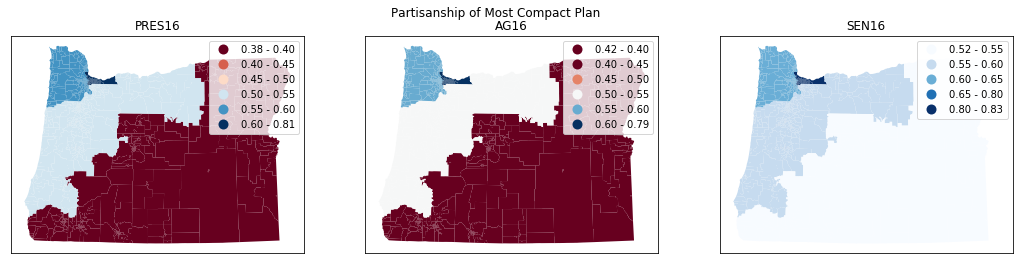

In [73]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))
fig.suptitle("Partisanship of Most Compact Plan")

df.plot(column="comp_PRESDS", cmap="RdBu", legend=True, ax=ax1, scheme="userdefined",
        classification_kwds={"bins":[0.4, 0.45, 0.5, 0.55, 0.6]})
ax1.set_title("PRES16")
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

df.plot(column="comp_AGDS", cmap="RdBu", legend=True, ax=ax2, scheme="userdefined",
        classification_kwds={"bins":[0.4, 0.45, 0.5, 0.55, 0.6]})
ax2.set_title("AG16")
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

df.plot(column="comp_SENDS", cmap="Blues", legend=True, ax=ax3,scheme="userdefined",
        classification_kwds={"bins":[0.55, 0.6, 0.65, 0.8]})
ax3.set_title("SEN16")
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)
plt.show()

In [61]:
list(map(lambda p: np.array(sorted(p["PRES16"].percents("Dem"))), compact_plans)

[array([0.37895867, 0.5091178 , 0.51627649, 0.58015873, 0.80953658]),
 array([0.37988235, 0.5071403 , 0.51627649, 0.58015873, 0.80953658]),
 array([0.37988235, 0.5054753 , 0.51627649, 0.58232492, 0.8084928 ])]

In [49]:
no_r_plans = []
for i in range(3):
    no_r_plans.append(Partition.from_json("data/neutral_partisan_ensemble/parts/0R_part_congress_AG16_{}.json".format(i),
                                         assignment="District", updaters=or_updaters))

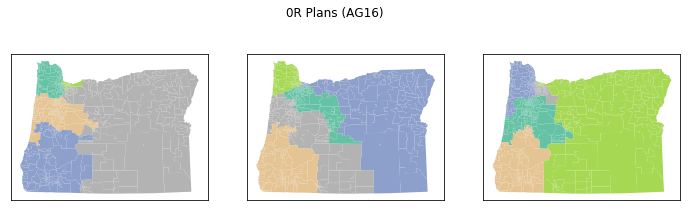

In [50]:
fig, axs = plt.subplots(1,3, figsize=(12,3.5))
fig.suptitle("0R Plans (AG16)")
for i in range(3):
    no_r_plans[i].plot(df, ax=axs[i], cmap="Set2")
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)
plt.show()

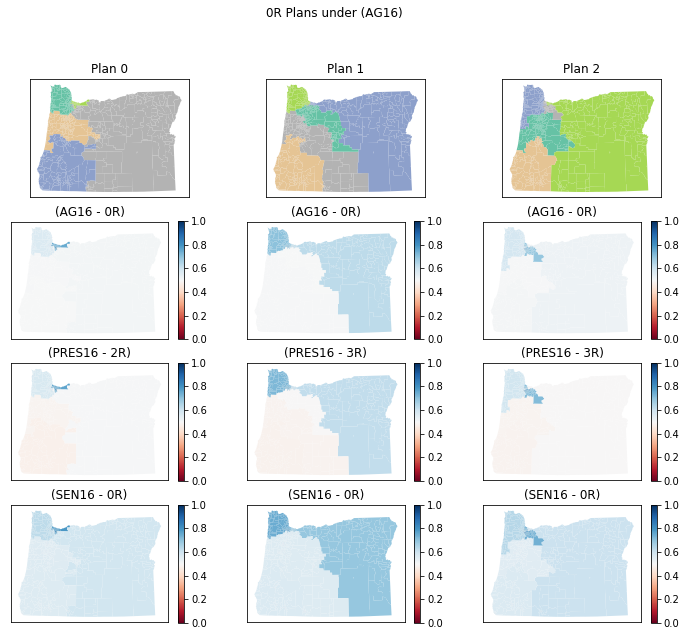

In [65]:
fig, axs = plt.subplots(4,3, figsize=(12,10))
fig.suptitle("0R Plans under (AG16)")

for i in range(3):
    axs[0][i].set_title("Plan {}". format(i))
    no_r_plans[i].plot(df, ax=axs[0][i], cmap="Set2")
    axs[0][i].axes.get_xaxis().set_visible(False)
    axs[0][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[1][i].set_title("(AG16 - {}R)".format(no_r_plans[i]["AG16"].seats("Rep")))
    df["x"] =[no_r_plans[i]["AG16"].percent("Dem", no_r_plans[i].assignment[j]) for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[1][i])
    axs[1][i].axes.get_xaxis().set_visible(False)
    axs[1][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[2][i].set_title("(PRES16 - {}R)".format(no_r_plans[i]["PRES16"].seats("Rep")))
    df["x"] =[no_r_plans[i]["PRES16"].percent("Dem", no_r_plans[i].assignment[j]) for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[2][i])
    axs[2][i].axes.get_xaxis().set_visible(False)
    axs[2][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[3][i].set_title("(SEN16 - {}R)".format(no_r_plans[i]["SEN16"].seats("Rep")))
    df["x"] =[no_r_plans[i]["SEN16"].percent("Dem", no_r_plans[i].assignment[j]) for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[3][i])
    axs[3][i].axes.get_xaxis().set_visible(False)
    axs[3][i].axes.get_yaxis().set_visible(False)

plt.show()

In [225]:
list(map(lambda p: np.array(sorted(p["PRES16"].percents("Dem"))), no_r_plans))

[array([0.47333683, 0.48526149, 0.50551215, 0.58157878, 0.76176033]),
 array([0.4793726 , 0.48393141, 0.49640991, 0.62227245, 0.723484  ]),
 array([0.48159102, 0.48613758, 0.49774011, 0.59489788, 0.7179022 ])]

In [67]:
three_r_plans_ag = []
for i in range(3):
    three_r_plans_ag.append(Partition.from_json("data/neutral_partisan_ensemble/parts/3R_part_congress_AG16_{}.json".format(i),
                                         assignment="District", updaters=or_updaters))

In [70]:
three_r_plans_p = []
for i in range(3):
    three_r_plans_p.append(Partition.from_json("data/neutral_partisan_ensemble/parts/3R_part_congress_PRES16_{}.json".format(i),
                                         assignment="District", updaters=or_updaters))

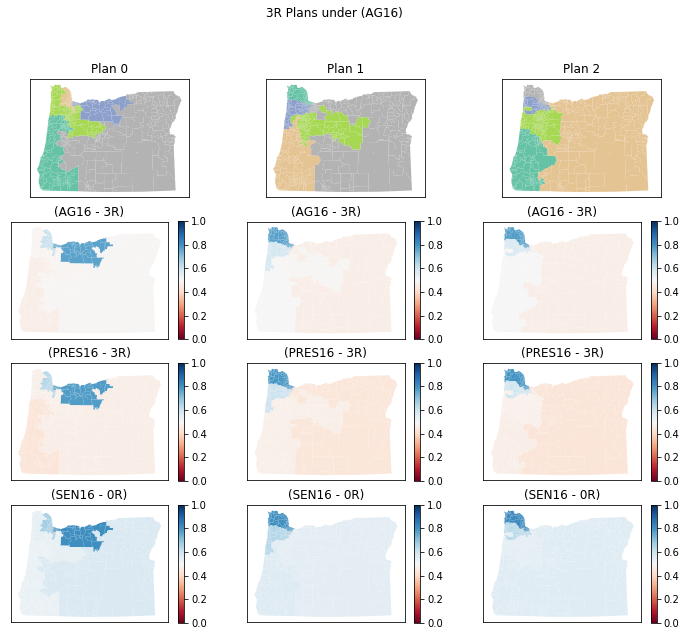

In [69]:
fig, axs = plt.subplots(4,3, figsize=(12,10))
fig.suptitle("3R Plans under (AG16)")

for i in range(3):
    axs[0][i].set_title("Plan {}". format(i))
    three_r_plans_ag[i].plot(df, ax=axs[0][i], cmap="Set2")
    axs[0][i].axes.get_xaxis().set_visible(False)
    axs[0][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[1][i].set_title("(AG16 - {}R)".format(three_r_plans_ag[i]["AG16"].seats("Rep")))
    df["x"] =[three_r_plans_ag[i]["AG16"].percent("Dem", three_r_plans_ag[i].assignment[j])
              for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[1][i])
    axs[1][i].axes.get_xaxis().set_visible(False)
    axs[1][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[2][i].set_title("(PRES16 - {}R)".format(three_r_plans_ag[i]["PRES16"].seats("Rep")))
    df["x"] =[three_r_plans_ag[i]["PRES16"].percent("Dem", three_r_plans_ag[i].assignment[j])
              for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[2][i])
    axs[2][i].axes.get_xaxis().set_visible(False)
    axs[2][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[3][i].set_title("(SEN16 - {}R)".format(three_r_plans_ag[i]["SEN16"].seats("Rep")))
    df["x"] =[three_r_plans_ag[i]["SEN16"].percent("Dem", three_r_plans_ag[i].assignment[j])
              for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[3][i])
    axs[3][i].axes.get_xaxis().set_visible(False)
    axs[3][i].axes.get_yaxis().set_visible(False)

plt.show()

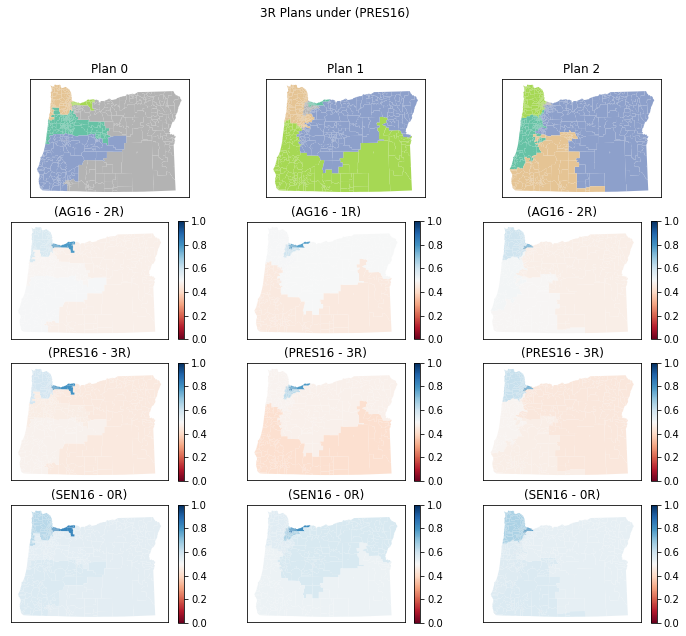

In [74]:
fig, axs = plt.subplots(4,3, figsize=(12,10))
fig.suptitle("3R Plans under (PRES16)")

for i in range(3):
    axs[0][i].set_title("Plan {}". format(i))
    three_r_plans_p[i].plot(df, ax=axs[0][i], cmap="Set2")
    axs[0][i].axes.get_xaxis().set_visible(False)
    axs[0][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[1][i].set_title("(AG16 - {}R)".format(three_r_plans_p[i]["AG16"].seats("Rep")))
    df["x"] =[three_r_plans_p[i]["AG16"].percent("Dem", three_r_plans_p[i].assignment[j])
              for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[1][i])
    axs[1][i].axes.get_xaxis().set_visible(False)
    axs[1][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[2][i].set_title("(PRES16 - {}R)".format(three_r_plans_p[i]["PRES16"].seats("Rep")))
    df["x"] =[three_r_plans_p[i]["PRES16"].percent("Dem", three_r_plans_p[i].assignment[j])
              for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[2][i])
    axs[2][i].axes.get_xaxis().set_visible(False)
    axs[2][i].axes.get_yaxis().set_visible(False)

for i in range(3):
    axs[3][i].set_title("(SEN16 - {}R)".format(three_r_plans_p[i]["SEN16"].seats("Rep")))
    df["x"] =[three_r_plans_p[i]["SEN16"].percent("Dem", three_r_plans_p[i].assignment[j])
              for j in df.index]
    df.plot(column="x", cmap="RdBu", legend=True, vmin=0, vmax=1, ax=axs[3][i])
    axs[3][i].axes.get_xaxis().set_visible(False)
    axs[3][i].axes.get_yaxis().set_visible(False)

plt.show()

In [229]:
list(map(lambda p: np.array(sorted(p["PRES16"].percents("Dem"))), three_r_plans_ag))

[array([0.43561593, 0.46667994, 0.469454  , 0.64485817, 0.77870353]),
 array([0.43779936, 0.46992479, 0.46995603, 0.60707417, 0.78928266]),
 array([0.43467443, 0.46702481, 0.4745426 , 0.59642927, 0.79890163])]

In [227]:
list(map(lambda p: np.array(sorted(p["AG16"].percents("Dem"))), three_r_plans_ag))

[array([0.46867554, 0.49123671, 0.4927798 , 0.61685696, 0.76847867]),
 array([0.46543719, 0.4941914 , 0.49945656, 0.58873122, 0.77026231]),
 array([0.46563497, 0.49673875, 0.49825464, 0.57609864, 0.77949854])]

In [230]:
list(map(lambda p: np.array(sorted(p["SEN16"].percents("Dem"))), three_r_plans_ag))

[array([0.5348261 , 0.54685237, 0.57458292, 0.6746766 , 0.81192782]),
 array([0.55080517, 0.55453702, 0.56320493, 0.64790058, 0.81039731]),
 array([0.54943793, 0.55918269, 0.56195963, 0.63480195, 0.81929777])]

In [207]:
import random

In [208]:
samp_plans = []
samp = random.sample(range(10),6)
for s in samp:
    samp_plans.append(Partition.from_json("data/neutral_partisan_ensemble/parts/sample_part_congress_{}.json".format(s),
                                         assignment="District", updaters=or_updaters))

In [209]:
elects = ["AG16", "PRES16", "GOV16", "GOV18",]

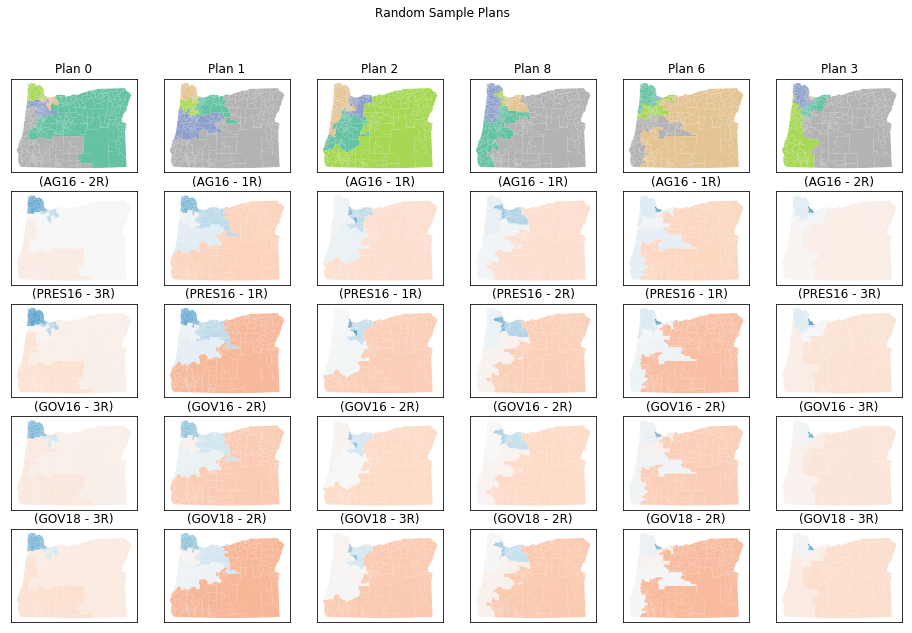

In [211]:
fig, axs = plt.subplots(5,6, figsize=(16,10))
fig.suptitle("Random Sample Plans")

for i in range(6):
    axs[0][i].set_title("Plan {}". format(samp[i]))
    samp_plans[i].plot(df, ax=axs[0][i], cmap="Set2")
    axs[0][i].axes.get_xaxis().set_visible(False)
    axs[0][i].axes.get_yaxis().set_visible(False)

for k, e in enumerate(elects):
    for i in range(6):
        axs[k+1][i].set_title("({} - {}R)".format(e, samp_plans[i][e].seats("Rep")))
        df["x"] =[samp_plans[i][e].percent("Dem", samp_plans[i].assignment[j])
                  for j in df.index]
        df.plot(column="x", cmap="RdBu", vmin=0, vmax=1, ax=axs[k+1][i])
        axs[k+1][i].axes.get_xaxis().set_visible(False)
        axs[k+1][i].axes.get_yaxis().set_visible(False)    

plt.savefig("plots/seats_on_sample_plans.png",bbox_inches="tight", dpi=100)
plt.show()

In [212]:
samp

[0, 1, 2, 8, 6, 3]

In [230]:
print("Plan 2")
for e in elects:
    print(e, "\t", np.array(samps[2][e].percents("Dem")))
print("Plan 4")    
for e in elects:
    print(e, "\t", np.array(samps[4][e].percents("Dem")))

Plan 2
AG16 	 [0.53487405 0.52579329 0.72707354 0.62459749 0.41443611]
PRES16 	 [0.51514054 0.50437226 0.76888673 0.61630974 0.37766174]
GOV16 	 [0.50362173 0.47916482 0.69856402 0.58765282 0.40081603]
GOV18 	 [0.4957841  0.4849443  0.70087766 0.58724155 0.37019086]
Plan 4
AG16 	 [0.50805707 0.51016419 0.78163679 0.57623283 0.45625819]
PRES16 	 [0.48578176 0.48681449 0.7958839  0.59848813 0.42071027]
GOV16 	 [0.48158297 0.45800159 0.75379515 0.53915558 0.44391513]
GOV18 	 [0.4683406  0.4690612  0.7549326  0.53638594 0.41319547]


In [110]:
samps = []
for i in range(10):
    samps.append(Partition.from_json("data/neutral_partisan_ensemble/parts/sample_part_congress_{}.json".format(i),
                                         assignment="District", updaters=or_updaters))

In [226]:
print("Plan\t|\t", "AG16\t", "PRES16\t", "GOV16\t", "GOV18\t", "SOS16", "SEN16\t",)
print("--"*35)
for i, plan in enumerate(samps):
    print("Plan ", i, "|\t", 
          "{} D\t".format(samps[i]["AG16"].seats("Dem")),
          "{} D\t".format(samps[i]["PRES16"].seats("Dem")),
          "{} D\t".format(samps[i]["GOV16"].seats("Dem")),
          "{} D\t".format(samps[i]["GOV18"].seats("Dem")),
          "{} D\t".format(samps[i]["SOS16"].seats("Dem")),
          "{} D\t".format(samps[i]["SEN16"].seats("Dem")),
         )

Plan	|	 AG16	 PRES16	 GOV16	 GOV18	 SOS16 SEN16	
----------------------------------------------------------------------
Plan  0 |	 3 D	 2 D	 2 D	 2 D	 2 D	 5 D	
Plan  1 |	 4 D	 4 D	 3 D	 3 D	 2 D	 4 D	
Plan  2 |	 4 D	 4 D	 3 D	 2 D	 2 D	 5 D	
Plan  3 |	 3 D	 2 D	 2 D	 2 D	 1 D	 5 D	
Plan  4 |	 4 D	 2 D	 2 D	 2 D	 1 D	 5 D	
Plan  5 |	 4 D	 3 D	 3 D	 3 D	 1 D	 4 D	
Plan  6 |	 4 D	 4 D	 3 D	 3 D	 1 D	 4 D	
Plan  7 |	 3 D	 3 D	 3 D	 3 D	 1 D	 5 D	
Plan  8 |	 4 D	 3 D	 3 D	 3 D	 2 D	 5 D	
Plan  9 |	 4 D	 4 D	 3 D	 3 D	 1 D	 5 D	


In [24]:
r_3_0 = Partition.from_json("data/neutral_partisan_ensemble/parts/3R_part_congress_AG16_0.json",
                          assignment="District", updaters=or_updaters)
r_3_1 = Partition.from_json("data/neutral_partisan_ensemble/parts/3R_part_congress_AG16_1.json",
                          assignment="District", updaters=or_updaters)

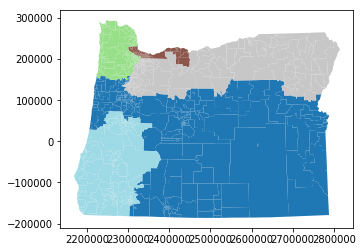

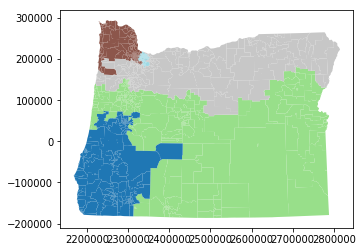

In [25]:
r_3_0.plot(df, cmap="tab20")
r_3_1.plot(df, cmap="tab20")

In [69]:
r_3_0["SEN16"].seats("Dem")

5

In [92]:
type(df.iloc[100])

pandas.core.series.Series

In [71]:
r_3_0.parts.keys()

dict_keys([0, 2, 1, 3, 4])

In [89]:
r_3_0.assignment

<Assignment [1333 keys, 5 parts]>

In [111]:
df["samp_3r_AGDS"] = [r_3_0["AG16"].percent("Dem", r_3_0.assignment[i]) for i in df.index]
df["samp_3r_SENDS"] = [r_3_0["SEN16"].percent("Dem", r_3_0.assignment[i]) for i in df.index]

In [105]:
df["samp_3r_AGDS"].unique()

array([0.49188956, 0.77102032, 0.60101858, 0.48746028, 0.49086112])

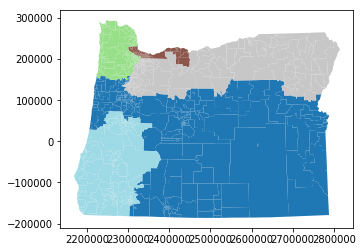

In [110]:
r_3_0.plot(df, cmap="tab20")

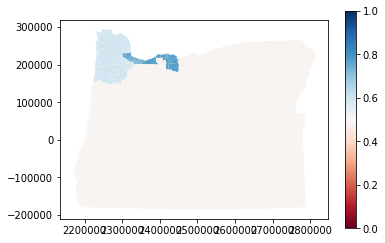

In [140]:
df.plot(column="samp_3r_AGDS", cmap="RdBu", legend=True, vmin=0, vmax=1)

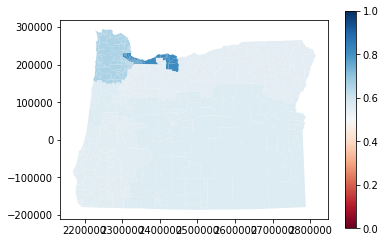

In [141]:
df.plot(column="samp_3r_SENDS", cmap="RdBu", legend=True, vmin=0, vmax=1)

### Load saved plans

In [233]:
sen_samp = Partition.from_json("data/neutral_partisan_ensemble/parts_10000/sample_part_state_senate_0.json",
                               assignment="District", updaters=or_updaters)

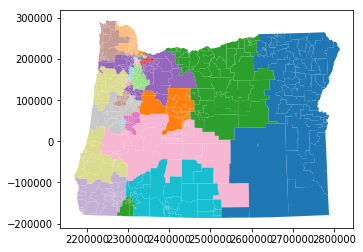

In [234]:
sen_samp.plot(df, cmap="tab20")

In [241]:
df["sen_samp_AGDS"] = [sen_samp["AG16"].percent("Dem", sen_samp.assignment[i]) for i in df.index]

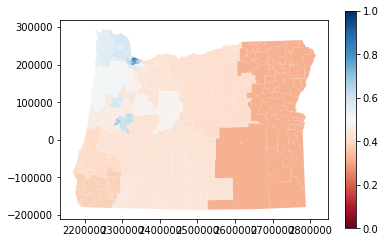

In [242]:
df.plot(column="sen_samp_AGDS", cmap="RdBu", legend=True, vmin=0, vmax=1)